<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">


<br><br><center><h1 style="font-size:2em;color:#2467C0"> Cambio de perspectiva (encontrar la vista aérea)  </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/libro_cambio.jpg" align="middle" style="width:550px;"/></td>
<td>

En esta lección aplicaremos funciones de **OpenCV** para llevar a cabo transformaciones geométricas, con el objetivo de cambiar la perspectiva de un conductor de automóvil a la vista aérea y de esta manera tener una mejor comprensión del camino.
   
<br>
</td>
</tr>
</table>

# 0. Librerías básicas

In [50]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd
import imutils

# Actividad 1
## Tomar una foto de un libro (asegurarse de que la foto tenga una perspectiva como la del ejemplo).

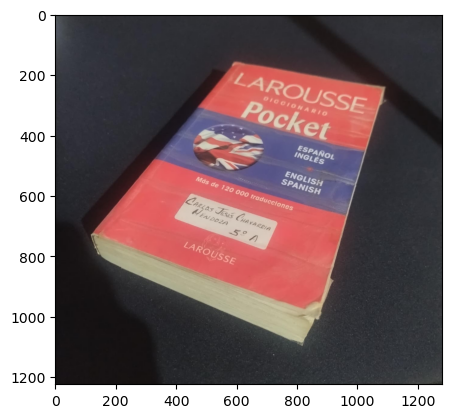

In [51]:
#El nombre de la variable para guardar la imagen origina de la carta será "img"
img =  cv.imread('figuras/diccionario.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

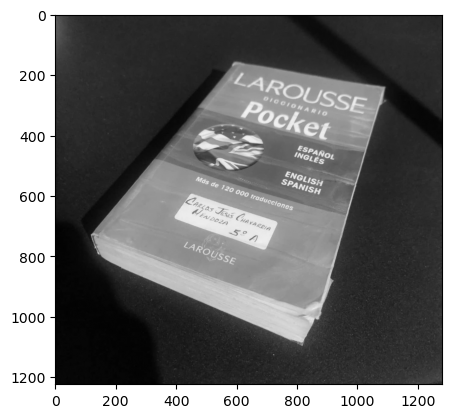

In [52]:
#Cambiar la imagen original a escala de grises
img_gris = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.imshow(img_gris, cmap='gray')
plt.show()


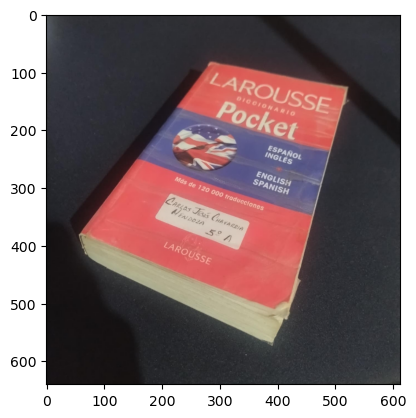

In [53]:
#Cambiar la imagen original a la mitad de tamaño
img_resize = cv.resize(img, (img.shape[0]//2, img.shape[1]//2))
plt.imshow(img_resize)
plt.show()

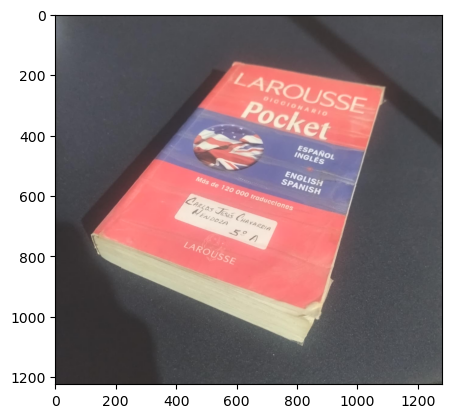

In [54]:
#Tomando la imagen original, aumentar la intensidad de la imagen (30 unidades)
M =  np.ones(img.shape, dtype=np.uint8) * 30
img30 = cv.add(img, M)
plt.imshow(img30)
plt.show()

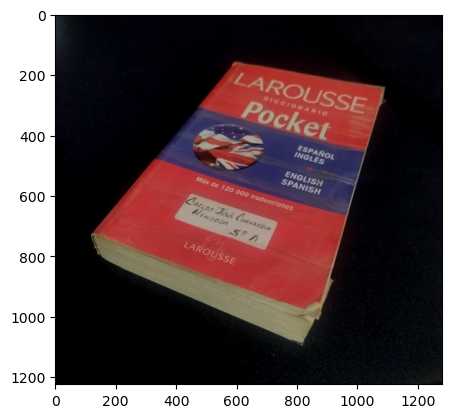

In [55]:
#Tomando la imagen original,disminuir la intensidad de la imagen (45 unidades)
M2 = np.ones(img.shape, dtype=np.uint8)*45 
img45 = cv.subtract(img, M2)
plt.imshow(img45)
plt.show()

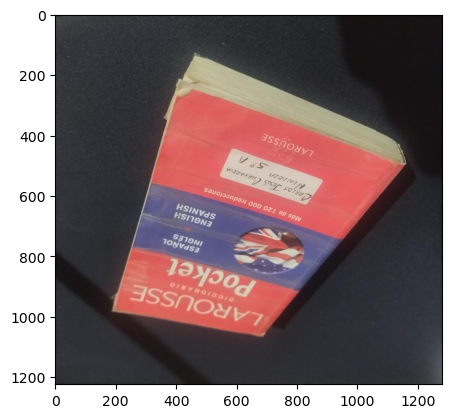

In [56]:
#Rotar la imagen original 180 grados
img180 = imutils.rotate(img, angle=180)
plt.imshow(img180)
plt.show()

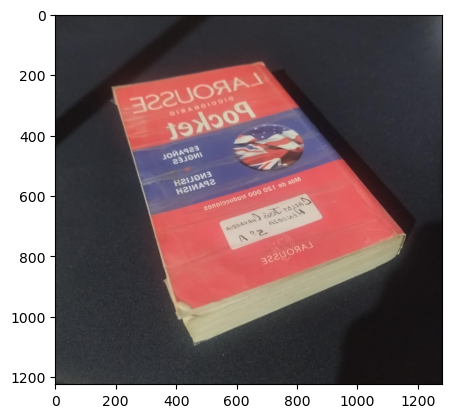

In [57]:
#Rotar la imagen original con efecto espejo
img_espejo = cv.flip(img, 1)
plt.imshow(img_espejo)
plt.show()

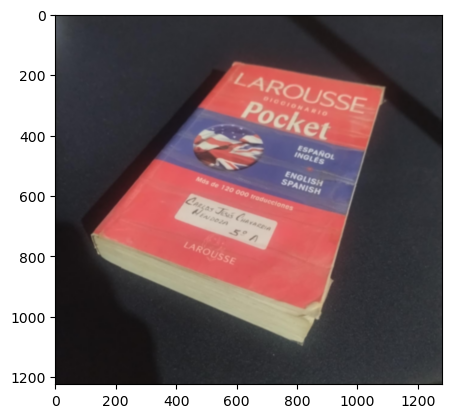

In [58]:
#Monstrar la imagen en gris con Filtro Gaussiano
img_gauss =  cv.GaussianBlur(img, ksize=(9,9), sigmaX=0)
plt.imshow(img_gauss)
plt.show()

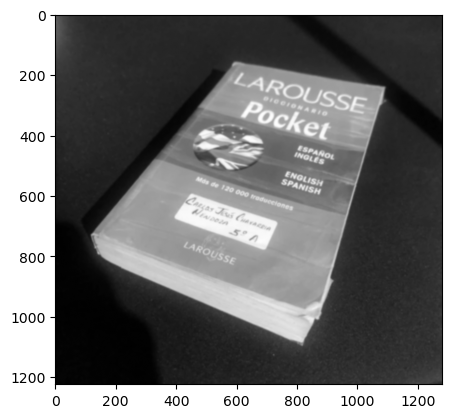

In [59]:
#Monstrar la imagen en gris con Filtro Gaussiano, ademas aplicar el detector de bordes de Canny
img_gris_gauss =  cv.GaussianBlur(img_gris, (11, 11), 0)
plt.imshow(img_gris_gauss, cmap='gray')
plt.show()

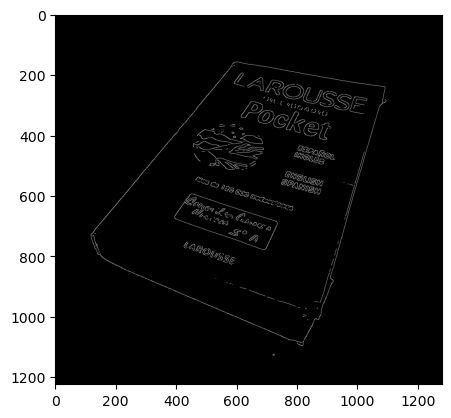

In [60]:
img_bordes =  cv.Canny(img_gris_gauss, 60, 60)
plt.imshow(img_bordes, cmap='gray')
plt.show()

# Actividad 2
Realizar el cambio de perspectiva

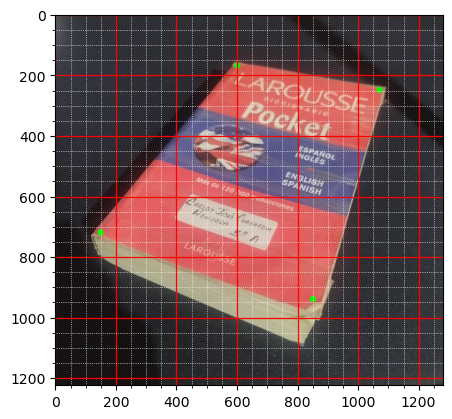

In [61]:
img =  cv.imread('figuras/diccionario.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig,ax = plt.subplots(figsize=(5,5))
puntos = [(600,170), (1070,250), (150,720), (850, 940)]
for pts in puntos:
    cv.circle(img, pts, 10, (0,255,0), - 1)
ax.imshow(img)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.9', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='white')

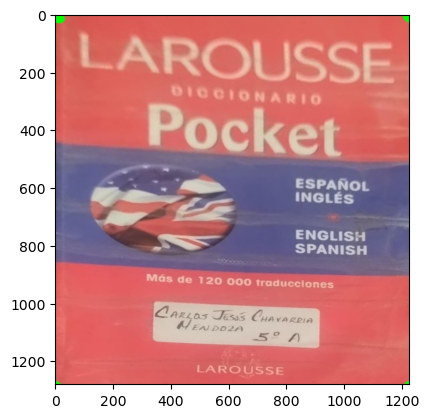

In [62]:
pts1 = np.float32(puntos)
pts2 = np.float32([(0,0), (img.shape[0], 0), (0,img.shape[1]), (img.shape[0], img.shape[1])])

m_transformer=cv.getPerspectiveTransform(pts1, pts2)
img_nueva_perspectiva=cv.warpPerspective( img, m_transformer, img.shape[:2])

plt.imshow(img_nueva_perspectiva)

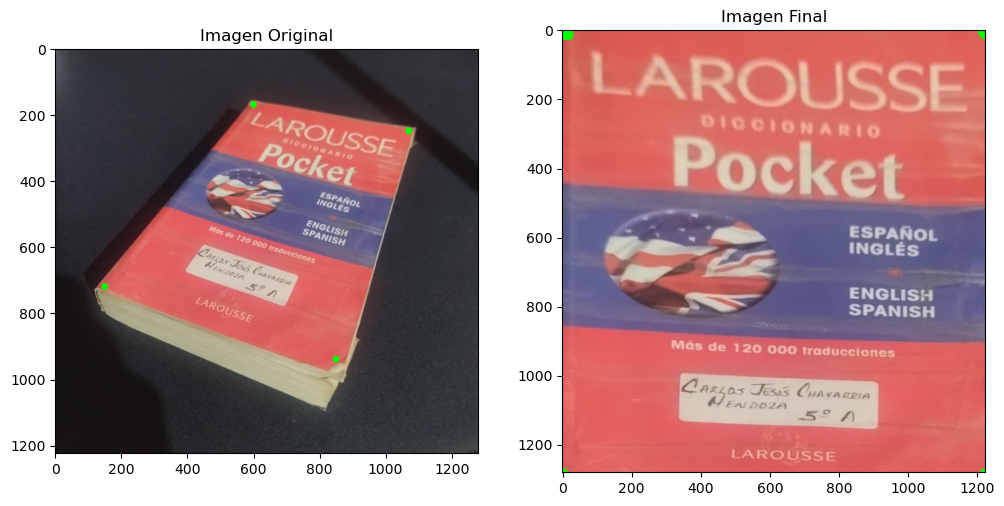

In [63]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title('Imagen Original')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Imagen Final')
plt.imshow(img_nueva_perspectiva)
plt.show()